In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection  import train_test_split
from sklearn import metrics
from scipy import stats
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import tree
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import export_graphviz

# Data Loading and Cleaning

In [2]:
df = pd.read_excel("airport_choice_survey_EN_ver2.0_Capstone.xlsx", sep=',', header=0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 28 columns):
ID                           488 non-null int64
Airport                      488 non-null int64
Airline                      478 non-null float64
Age                          487 non-null float64
Gender                       485 non-null float64
Nationality                  488 non-null int64
TripPurpose                  488 non-null int64
TripDuration                 488 non-null int64
FlyingCompanion              488 non-null int64
ProvinceResidence            488 non-null int64
GroupTravel                  488 non-null int64
NoTripsLastYear              488 non-null int64
FrequentFlightDestination    488 non-null object
Destination                  483 non-null float64
FlightNo                     346 non-null object
DepartureHr                  455 non-null object
DepartureMn                  368 non-null float64
DepartureTime                488 non-null int64
SeatClass         

In [3]:
df.head()
df.describe()

,ID,Airport,Airline,Age,Gender,Nationality,TripPurpose,TripDuration,FlyingCompanion,ProvinceResidence,...,DepartureTime,SeatClass,Airfare,NoTransport,ModeTransport,AccessCost,AccessTime,Occupation,Income,Mileage
count,488.000000,488.000000,478.000000,487.000000,485.000000,488.000000,488.000000,488.000000,488.000000,488.000000,...,488.000000,484.000000,333.000000,488.000000,488.000000,291.000000,391.000000,488.000000,356.000000,90.000000
mean,244.500000,1.510246,2.422594,39.965092,1.527835,1.483607,1.518443,27.440574,2.819672,3.391393,...,2.432377,1.121901,50.456577,1.334016,3.801230,11220.079038,51.831202,6.768443,3.126404,56383.700000
std,141.017729,0.500408,1.208492,13.672869,0.499740,1.013126,0.861966,74.988134,4.001573,2.599259,...,0.749769,0.396172,28.981217,0.552306,2.380499,24083.030747,43.486834,4.172077,1.573828,89411.837228
min,1.000000,1.000000,1.000000,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000,1.000000
25%,122.750000,1.000000,1.000000,29.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,...,2.000000,1.000000,35.000000,1.000000,2.000000,2000.000000,25.000000,2.000000,2.000000,8257.500000
50%,244.500000,2.000000,2.000000,38.000000,2.000000,1.000000,1.000000,5.000000,2.000000,3.000000,...,2.000000,1.000000,45.000000,1.000000,3.000000,6000.000000,40.000000,8.000000,3.000000,27997.500000
75%,366.250000,2.000000,4.000000,50.000000,2.000000,1.000000,2.000000,8.000000,3.000000,5.000000,...,3.000000,1.000000,60.000000,2.000000,6.000000,12000.000000,60.000000,12.000000,4.000000,61808.000000
max,488.000000,2.000000,4.000000,80.000000,2.000000,5.000000,4.000000,730.000000,34.000000,8.000000,...,4.000000,3.000000,260.000000,4.000000,11.000000,350000.000000,390.000000,12.000000,7.000000,500000.000000


# Missing Value Processing

In [4]:
# check number of missing values
df.isnull().sum()

ID                             0
Airport                        0
Airline                       10
Age                            1
Gender                         3
Nationality                    0
TripPurpose                    0
TripDuration                   0
FlyingCompanion                0
ProvinceResidence              0
GroupTravel                    0
NoTripsLastYear                0
FrequentFlightDestination      0
Destination                    5
FlightNo                     142
DepartureHr                   33
DepartureMn                  120
DepartureTime                  0
SeatClass                      4
Airfare                      155
NoTransport                    0
ModeTransport                  0
AccessCost                   197
AccessTime                    97
Occupation                     0
Income                       132
MileageAirline               237
Mileage                      398
dtype: int64

In [5]:
# fill the missing value with age median value
median =df['Age'].median()
df['Age'].fillna(median, inplace=True)

In [6]:
# fill the missing value with gender mode
df['Gender'].mode()
df['Gender'].fillna(2, inplace=True)

In [7]:
# check SeatClass missing values across Airfare
df[df['SeatClass'].isnull()]

,ID,Airport,Airline,Age,Gender,Nationality,TripPurpose,TripDuration,FlyingCompanion,ProvinceResidence,...,SeatClass,Airfare,NoTransport,ModeTransport,AccessCost,AccessTime,Occupation,Income,MileageAirline,Mileage
244,245,2,2.0,76.0,1.0,1,4,4,2,3,...,NaN,24.0,1,1,NaN,90.0,11,1.0,NaN,NaN
254,255,2,4.0,23.0,2.0,2,1,7,1,8,...,NaN,24.0,1,5,2000.0,30.0,2,3.0,4,NaN
449,450,2,4.0,28.0,1.0,1,2,7,2,3,...,NaN,NaN,1,3,1000.0,20.0,2,2.0,2,5000.0
474,475,2,2.0,69.0,2.0,1,2,365,0,1,...,NaN,50.0,1,5,NaN,45.0,12,1.0,2,17918.0


In [8]:
# check the Airfare range of SeatClass
df[df[['SeatClass', 'Airfare']]['SeatClass']==1].describe()

,ID,Airport,Airline,Age,Gender,Nationality,TripPurpose,TripDuration,FlyingCompanion,ProvinceResidence,...,DepartureTime,SeatClass,Airfare,NoTransport,ModeTransport,AccessCost,AccessTime,Occupation,Income,Mileage
count,437.000000,437.000000,427.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,...,437.000000,437.0,301.000000,437.000000,437.000000,258.000000,351.000000,437.000000,318.000000,78.000000
mean,244.025172,1.505721,2.412178,39.409611,1.537757,1.501144,1.503432,27.718535,2.711670,3.340961,...,2.441648,1.0,49.332359,1.329519,3.796339,10986.988372,52.757835,6.814645,3.047170,53071.423077
std,141.214366,0.500540,1.200016,13.593347,0.499144,1.037430,0.861038,75.358202,3.781192,2.587105,...,0.750782,0.0,26.827267,0.547197,2.363170,24554.630835,45.169156,4.114749,1.484188,78759.264585
min,1.000000,1.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.0,3.000000,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000,1.000000
25%,123.000000,1.000000,1.000000,29.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,...,2.000000,1.0,34.140000,1.000000,2.000000,2000.000000,25.000000,2.000000,2.000000,8000.000000
50%,242.000000,2.000000,2.000000,37.000000,2.000000,1.000000,1.000000,5.000000,2.000000,3.000000,...,2.000000,1.0,44.000000,1.000000,3.000000,6000.000000,40.000000,8.000000,3.000000,29717.000000
75%,365.000000,2.000000,4.000000,50.000000,2.000000,1.000000,2.000000,8.000000,3.000000,5.000000,...,3.000000,1.0,57.000000,2.000000,6.000000,11925.000000,60.000000,12.000000,4.000000,61808.000000
max,486.000000,2.000000,4.000000,80.000000,2.000000,5.000000,4.000000,730.000000,34.000000,8.000000,...,4.000000,1.0,222.000000,4.000000,11.000000,350000.000000,390.000000,12.000000,7.000000,500000.000000


In [9]:
# Fill missing value of SeatClass with Economy
df['SeatClass'].fillna(1, inplace=True)

In [10]:
# Fill missing value of Airline
def impute_airline(cols):
    Airline = cols[0]
    Nationality=cols[1]
    
    if pd.isnull(Airline):
        
        if Nationality==1:
            
            return 1
        
        else:
            return 4
        
    else:
        return Airline

In [11]:
df['Airline']=df[['Airline','Nationality']].apply(impute_airline,axis=1)

In [12]:
# fill destination missing value with mode across Airline
def impute_destination(cols):
    Destination = cols[0]
    Airline = cols[1]
    
    if pd.isnull(Destination):
        
        if Airline == 1:
            
            return 1
        
        elif Airline == 2:
            
            return 2
        
        elif Airline == 3:
            
            return 3
        
        elif Airline == 4:
            
            return 2
    
    else:
        return Destination

In [13]:
df['Destination']=df[['Destination','Airline']].apply(impute_destination, axis=1)

# Outlier Processing

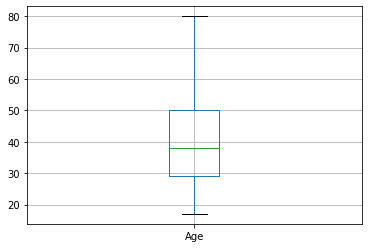

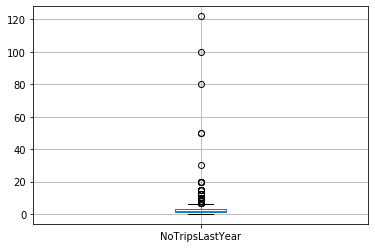

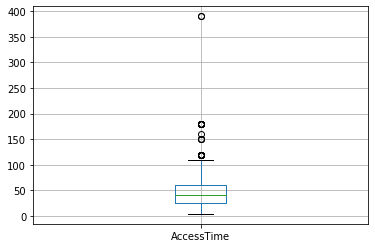

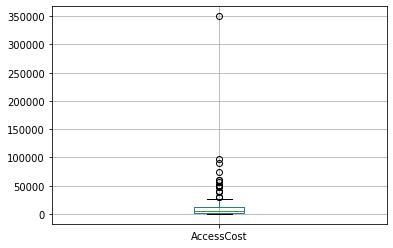

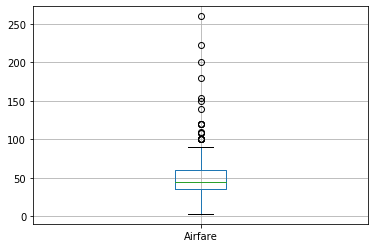

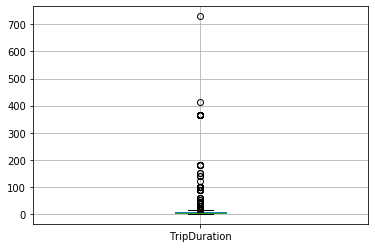

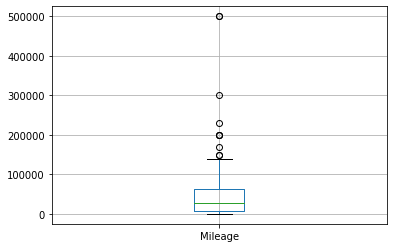

In [14]:
age_boxplt = df.boxplot(column=['Age'])
plt.show()
Notrip_boxplt = df.boxplot(column=['NoTripsLastYear'])
plt.show()
AssTime_boxplt = df.boxplot(column=['AccessTime']) 
plt.show()
AssCost_boxplt = df.boxplot(column=['AccessCost']) 
plt.show()
AssCost_boxplt = df.boxplot(column=['Airfare'])
plt.show()
TripDur_boxplt = df.boxplot(column=['TripDuration']) 
plt.show()
Mile_boxplt = df.boxplot(column=['Mileage']) 
plt.show()

In [15]:
# remove outlier in TripDuration
df_clean = df[df['TripDuration'] != 730]
df_clean = df_clean[df['AccessCost'] != 350000]
df_clean = df_clean[df['AccessTime'] != 390]

/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [16]:
df_clean.describe()

,ID,Airport,Airline,Age,Gender,Nationality,TripPurpose,TripDuration,FlyingCompanion,ProvinceResidence,...,DepartureTime,SeatClass,Airfare,NoTransport,ModeTransport,AccessCost,AccessTime,Occupation,Income,Mileage
count,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,...,484.000000,484.000000,330.000000,484.000000,484.000000,288.000000,387.000000,484.000000,353.000000,89.000000
mean,244.969008,1.514463,2.413223,40.041322,1.530992,1.487603,1.514463,26.121901,2.832645,3.388430,...,2.425620,1.121901,50.363758,1.334711,3.778926,9934.177083,50.041344,6.741736,3.133144,56230.707865
std,141.449729,0.500308,1.215289,13.665266,0.499555,1.016352,0.862010,68.141307,4.012776,2.603937,...,0.748113,0.396172,29.029185,0.553133,2.370167,13381.785947,36.229026,4.174932,1.578209,89906.576121
min,1.000000,1.000000,1.000000,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000,1.000000
25%,121.750000,1.000000,1.000000,29.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,...,2.000000,1.000000,35.000000,1.000000,2.000000,2000.000000,25.000000,2.000000,2.000000,8000.000000
50%,246.500000,2.000000,2.000000,38.000000,2.000000,1.000000,1.000000,5.000000,2.000000,3.000000,...,2.000000,1.000000,45.000000,1.000000,3.000000,6000.000000,40.000000,8.000000,3.000000,26561.000000
75%,367.250000,2.000000,4.000000,50.000000,2.000000,1.000000,2.000000,8.000000,3.000000,5.000000,...,3.000000,1.000000,60.000000,2.000000,6.000000,11775.000000,60.000000,12.000000,4.000000,50000.000000
max,488.000000,2.000000,4.000000,80.000000,2.000000,5.000000,4.000000,415.000000,34.000000,8.000000,...,4.000000,3.000000,260.000000,4.000000,11.000000,98000.000000,180.000000,12.000000,7.000000,500000.000000


# Recategory and Recoded Variables

In [17]:
# Recoded Airport
df_clean['Airport']=np.where(df_clean['Airport'] == 1,0,1)

In [18]:
# Recoded Gender
df_clean['Gender']=np.where(df_clean['Gender'] == 1,0,1)

In [19]:
# Recoded Group travel
df_clean['GroupTravel']=np.where(df_clean['GroupTravel'] == 1,0,1)

In [20]:
# Recoded Destination
df_clean.loc[df_clean['Destination']==1,'Destination'] ='0'
df_clean.loc[df_clean['Destination']==2,'Destination'] ='1'
df_clean.loc[df_clean['Destination']==3,'Destination'] ='2'
df_clean.loc[df_clean['Destination']==4,'Destination'] ='3'

In [21]:
# Recoded Departure time
df_clean.loc[df_clean['DepartureTime']==1,'DepartureTime'] ='0'
df_clean.loc[df_clean['DepartureTime']==2,'DepartureTime'] ='1'
df_clean.loc[df_clean['DepartureTime']==3,'DepartureTime'] ='2'
df_clean.loc[df_clean['DepartureTime']==4,'DepartureTime'] ='3'

In [22]:
# Recoded Seat Class
df_clean.loc[df_clean['SeatClass']==1,'SeatClass'] ='0'
df_clean.loc[df_clean['SeatClass']==2,'SeatClass'] ='1'
df_clean.loc[df_clean['SeatClass']==3,'SeatClass'] ='2'

In [23]:
# Recategory Airline method 1 --Korea and non-korea
df_clean['Airline_KOR'] = 0
df_clean.loc[df_clean['Airline']==1,'Airline_KOR'] ='1'
df_clean.loc[df_clean['Airline']==2,'Airline_KOR'] ='1'
df_clean.loc[df_clean['Airline']==3,'Airline_KOR'] ='1'
df_clean.loc[df_clean['Airline']==4,'Airline_KOR'] ='0'

In [24]:
# Recategory Airline method 2 -- LCC and non-LCC
df_clean['Airline_LCC'] = 0
df_clean.loc[df_clean['Airline']==1,'Airline_LCC'] ='1'
df_clean.loc[df_clean['Airline']==2,'Airline_LCC'] ='1'
df_clean.loc[df_clean['Airline']==4,'Airline_LCC'] ='1'
df_clean.loc[df_clean['Airline']==3,'Airline_LCC'] ='0'

In [25]:
# Recategory Age
df_clean['Age']=np.where(df_clean['Age'] < 60,1,0)

In [26]:
# Recategory Nationality
df_clean['Nationality']=np.where(df_clean['Nationality'] == 1,1,0)

In [27]:
# Recategory trip purpose
df_clean['TripPurpose']=np.where(df_clean['TripPurpose'] == 1,1,0)

In [28]:
# Recategory FrequentFlightDestination
df_clean.loc[df_clean['FrequentFlightDestination']==1,'FrequentFlightDestination'] ='0'
df_clean.loc[df_clean['FrequentFlightDestination']==2,'FrequentFlightDestination'] ='0'
df_clean.loc[df_clean['FrequentFlightDestination']==3,'FrequentFlightDestination'] ='0'
df_clean.loc[df_clean['FrequentFlightDestination']==4,'FrequentFlightDestination'] ='1'
df_clean.loc[df_clean['FrequentFlightDestination']==5,'FrequentFlightDestination'] ='1'
df_clean.loc[df_clean['FrequentFlightDestination']==6,'FrequentFlightDestination'] ='2'
df_clean.loc[df_clean['FrequentFlightDestination']==7,'FrequentFlightDestination'] ='2'

In [29]:
# Recategory ProvinceResidence
df_clean.loc[df_clean['ProvinceResidence']==1,'ProvinceResidence'] ='1'
df_clean.loc[df_clean['ProvinceResidence']==2,'ProvinceResidence'] ='1'
df_clean.loc[df_clean['ProvinceResidence']==3,'ProvinceResidence'] ='1'
df_clean.loc[df_clean['ProvinceResidence']==4,'ProvinceResidence'] ='1'
df_clean.loc[df_clean['ProvinceResidence']==5,'ProvinceResidence'] ='0'
df_clean.loc[df_clean['ProvinceResidence']==6,'ProvinceResidence'] ='0'
df_clean.loc[df_clean['ProvinceResidence']==7,'ProvinceResidence'] ='0'
df_clean.loc[df_clean['ProvinceResidence']==8,'ProvinceResidence'] ='0'

In [30]:
# Recategory trip duration
df_clean['TripDuration']=np.where(df_clean['TripDuration'] == 1,0,1)

In [31]:
# NoTripsLastYear
df_clean['NoTripsLastYear']=np.where(df_clean['NoTripsLastYear'] >= 3,1,0)

In [32]:
# Recategory Access time
df_clean.loc[np.logical_and(df_clean['AccessTime'] >0,df_clean['AccessTime'] <=60), 'AccessTime'] =0
df_clean.loc[df_clean['AccessTime'] > 60,'AccessTime'] =1
df_clean.loc[np.isnan(df_clean['AccessTime']),'AccessTime'] = 2

df_clean.loc[df_clean['AccessTime'] == 0, 'AccessTime'] = '0'
df_clean.loc[df_clean['AccessTime'] == 1, 'AccessTime'] = '1'
df_clean.loc[df_clean['AccessTime'] ==2,'AccessTime'] = '2'

In [33]:
# Recategory Airfare
df_clean.loc[np.logical_and(df_clean['Airfare']>0, df_clean['Airfare']<=50),'Airfare'] = 0
df_clean.loc[np.logical_and(df_clean['Airfare'] > 50,df_clean['Airfare']<=100),'Airfare'] =1
df_clean.loc[df_clean['Airfare'] >100,'Airfare'] =2
df_clean.loc[np.isnan(df_clean['Airfare']),'Airfare'] =3

df_clean.loc[df_clean['Airfare'] == 0, 'Airfare'] = '0'
df_clean.loc[df_clean['Airfare'] == 1, 'Airfare'] = '1'
df_clean.loc[df_clean['Airfare'] == 2, 'Airfare'] = '2'
df_clean.loc[df_clean['Airfare'] == 3,'Airfare'] = '3'

In [34]:
# Recategory occupation
df_clean['Occupation']=np.where(df_clean['Occupation'] == 1,0,1)

In [35]:
# Recategory income class
df_clean.loc[df_clean['Income']==1,'Income'] ='0'
df_clean.loc[df_clean['Income']==2,'Income'] ='0'
df_clean.loc[df_clean['Income']==3,'Income'] ='0'
df_clean.loc[df_clean['Income']==4,'Income'] ='0'
df_clean.loc[df_clean['Income']==5,'Income'] ='1'
df_clean.loc[df_clean['Income']==6,'Income'] ='1'
df_clean.loc[df_clean['Income']==7,'Income'] ='2'
df_clean.loc[df_clean['Income'].isnull(),'Income'] ='3'

In [36]:
# Recategory number of transportations
df_clean['NoTransport']=np.where(df_clean['NoTransport'] == 1,0,1)

# Basic EDA

In [37]:
df_plot = df_clean.iloc[:,:].copy()

In [38]:
df2 = df.iloc[:,:].copy()

df2['Airport_cat'] = np.where(df['Airport'] == 1 ,'ICN','GMP')
df2['Airline_cat'] = df2['Airline'].replace( 1.0, 'Korean Air')
df2['Airline_cat'] = df2['Airline'].replace( 2.0, 'Asiana Airlines')
df2['Airline_cat'] = df2['Airline'].replace( 3.0, 'Korean LCC')
df2['Airline_cat'] = df2['Airline'].replace(4.0, 'Foreign Airlines')
  
df2['Gender'] = np.where(df['Gender'] == 2 ,'Female','Male')

df2['Nationality'] = df2['Nationality'].replace(1, 'Korea')
df2['Nationality'] = df2['Nationality'].replace(2, 'China')
df2['Nationality'] = df2['Nationality'].replace(3, 'Japan')
df2['Nationality'] = df2['Nationality'].replace(4, 'Southeast Asia')
df2['Nationality'] = df2['Nationality'].replace(5, 'Other')

df2['TripPurpose'] = df2['TripPurpose'].replace(1, 'Leisure Travel')
df2['TripPurpose'] = df2['TripPurpose'].replace(2, 'Business Travel')
df2['TripPurpose'] = df2['TripPurpose'].replace(3, 'Study')
df2['TripPurpose'] = df2['TripPurpose'].replace(4, 'Other')

df2['ProvinceResidence'] = df2['ProvinceResidence'].replace(1, 'Seoul')
df2['ProvinceResidence'] = df2['ProvinceResidence'].replace(2, 'Incheon')
df2['ProvinceResidence'] = df2['ProvinceResidence'].replace(3, 'Kyungki-do')
df2['ProvinceResidence'] = df2['ProvinceResidence'].replace(4, 'Chungcheong-do')
df2['ProvinceResidence'] = df2['ProvinceResidence'].replace(5, 'Kyungsang-do')
df2['ProvinceResidence'] = df2['ProvinceResidence'].replace(6, 'Jeonra-do')
df2['ProvinceResidence'] = df2['ProvinceResidence'].replace(7, 'Kangwon-do')
df2['ProvinceResidence'] = df2['ProvinceResidence'].replace(8, 'Other')

df2['GroupTravel'] = df2['GroupTravel'].replace(1, 'Yes')
df2['GroupTravel'] = df2['GroupTravel'].replace(2, 'No')

df2['FrequentFlightDestination'] = df2['FrequentFlightDestination'].replace(1, 'Southeast Asia')
df2['FrequentFlightDestination'] = df2['FrequentFlightDestination'].replace(2, 'China')
df2['FrequentFlightDestination'] = df2['FrequentFlightDestination'].replace(3, 'Japan')
df2['FrequentFlightDestination'] = df2['FrequentFlightDestination'].replace(4, 'North/South America')
df2['FrequentFlightDestination'] = df2['FrequentFlightDestination'].replace(5, 'Europe')
df2['FrequentFlightDestination'] = df2['FrequentFlightDestination'].replace(6, 'Other')
df2['FrequentFlightDestination'] = df2['FrequentFlightDestination'].replace(7, 'None')

df2['FrequentFlightDestination'] = df2['FrequentFlightDestination'].replace(4, 'North/South America')
df2['FrequentFlightDestination'] = df2['FrequentFlightDestination'].replace(5, 'Europe')
df2['FrequentFlightDestination'] = df2['FrequentFlightDestination'].replace(6, 'Other')
df2['FrequentFlightDestination'] = df2['FrequentFlightDestination'].replace(7, 'None')

df2['Destination'] = df2['Destination'].replace(1, 'China')
df2['Destination'] = df2['Destination'].replace(2, 'Japan')
df2['Destination'] = df2['Destination'].replace(3, 'Southeast Asia')
df2['Destination'] = df2['Destination'].replace(4, 'Other')

df2['DepartureTime'] = df2['DepartureTime'].replace(1, '6am-12pm')
df2['DepartureTime'] = df2['DepartureTime'].replace(2, '12pm-6pm')
df2['DepartureTime'] = df2['DepartureTime'].replace(3, '6pm-9pm')
df2['DepartureTime'] = df2['DepartureTime'].replace(4, '9pm-6am')

df2['SeatClass'] = df2['SeatClass'].replace(1, 'Economy')
df2['SeatClass'] = df2['SeatClass'].replace(2, 'Business')
df2['SeatClass'] = df2['SeatClass'].replace(3, 'First Class')

df2['ModeTransport'] = df2['ModeTransport'].replace(1, 'Car')
df2['ModeTransport'] = df2['ModeTransport'].replace(2, 'Taxi')
df2['ModeTransport'] = df2['ModeTransport'].replace(3, 'Bus')
df2['ModeTransport'] = df2['ModeTransport'].replace(4, 'Express Bus')
df2['ModeTransport'] = df2['ModeTransport'].replace(5, 'Subway')
df2['ModeTransport'] = df2['ModeTransport'].replace(6, 'Airport Limousine')
df2['ModeTransport'] = df2['ModeTransport'].replace(7, 'Rail')
df2['ModeTransport'] = df2['ModeTransport'].replace(8, 'KTX')
df2['ModeTransport'] = df2['ModeTransport'].replace(9, 'Shuttle')
df2['ModeTransport'] = df2['ModeTransport'].replace(10, 'Air')
df2['ModeTransport'] = df2['ModeTransport'].replace(11, 'Other')

df2['Occupation'] = df2['Occupation'].replace(1, 'Entrepreneur/Senior management')
df2['Occupation'] = df2['Occupation'].replace(2, 'Business')
df2['Occupation'] = df2['Occupation'].replace(3, 'Sales/Service')
df2['Occupation'] = df2['Occupation'].replace(4, 'Government/Military')
df2['Occupation'] = df2['Occupation'].replace(5, 'Doctor/Lawyer/Professor')
df2['Occupation'] = df2['Occupation'].replace(6, 'Industrial/Manufacturing')
df2['Occupation'] = df2['Occupation'].replace(7, 'Self-employeed')
df2['Occupation'] = df2['Occupation'].replace(8, 'Student')
df2['Occupation'] = df2['Occupation'].replace(9, 'Housewife')
df2['Occupation'] = df2['Occupation'].replace(10, 'Retired')
df2['Occupation'] = df2['Occupation'].replace(11, 'None')
df2['Occupation'] = df2['Occupation'].replace(12, 'Other')

df2['Income'] = df2['Income'].replace(1, '<=30M')
df2['Income'] = df2['Income'].replace(2, '30-50M')
df2['Income'] = df2['Income'].replace(3, '50-80M')
df2['Income'] = df2['Income'].replace(4, '80-100M')
df2['Income'] = df2['Income'].replace(5, '100-150M')
df2['Income'] = df2['Income'].replace(6, '150-200M')
df2['Income'] = df2['Income'].replace(7, '>200M')



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c253124d0>,
      dtype=object)

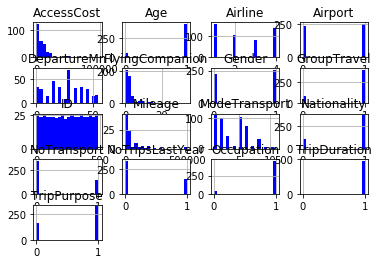

In [39]:
df_plot.hist(color='blue',alpha=1,bins=20)

In [40]:
df_plot.corr()

,ID,Airport,Airline,Age,Gender,Nationality,TripPurpose,TripDuration,FlyingCompanion,GroupTravel,NoTripsLastYear,DepartureMn,NoTransport,ModeTransport,AccessCost,Occupation,Mileage
ID,1.000000,0.867107,0.111385,-0.125416,0.087782,-0.175865,-0.121962,-0.095065,0.057112,-0.040098,-0.016172,0.143440,-0.214292,-0.116459,0.047606,-0.002649,-0.081663
Airport,0.867107,1.000000,0.105925,-0.124091,0.023054,-0.191463,-0.194533,-0.117686,0.035756,0.046007,0.047009,0.137981,-0.286033,-0.109913,0.094264,-0.061686,-0.027992
Airline,0.111385,0.105925,1.000000,0.097960,0.019785,-0.140291,0.066928,-0.030041,-0.126740,0.142497,-0.008137,0.084260,0.051883,-0.004877,-0.095429,0.021067,-0.116497
Age,-0.125416,-0.124091,0.097960,1.000000,-0.125021,-0.106373,-0.094697,-0.044260,-0.215130,0.187992,0.138115,0.134118,0.068010,-0.009749,-0.044746,-0.080993,0.105715
Gender,0.087782,0.023054,0.019785,-0.125021,1.000000,0.033680,0.329430,0.059541,0.115687,-0.146452,-0.189146,-0.017742,0.045991,0.017164,0.027103,0.181474,-0.184217
Nationality,-0.175865,-0.191463,-0.140291,-0.106373,0.033680,1.000000,0.171705,0.058189,0.121258,-0.170417,-0.097842,-0.135574,0.059433,-0.063131,-0.022530,0.122294,0.056359
TripPurpose,-0.121962,-0.194533,0.066928,-0.094697,0.329430,0.171705,1.000000,0.171585,0.188217,-0.254063,-0.349952,-0.039249,0.130409,0.069280,-0.132589,0.209465,-0.170960
TripDuration,-0.095065,-0.117686,-0.030041,-0.044260,0.059541,0.058189,0.171585,1.000000,0.025162,-0.009819,0.007921,-0.023069,0.040517,0.076398,0.021498,-0.034853,-0.529149
FlyingCompanion,0.057112,0.035756,-0.126740,-0.215130,0.115687,0.121258,0.188217,0.025162,1.000000,-0.494095,-0.164499,-0.106228,0.032684,-0.106863,-0.061848,0.083037,-0.093094
GroupTravel,-0.040098,0.046007,0.142497,0.187992,-0.146452,-0.170417,-0.254063,-0.009819,-0.494095,1.000000,0.194228,0.151307,-0.073917,0.065505,-0.083393,-0.049717,0.052439


In [41]:
df_plot['Airport']=df_plot['Airport'].replace(1,'GMP')
df_plot['Airport']=df_plot['Airport'].replace(0,'ICN')

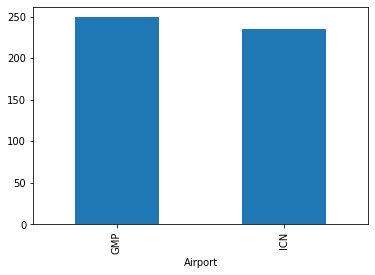

In [42]:
df_plot.groupby(['Airport'])['ID'].count().plot.bar()

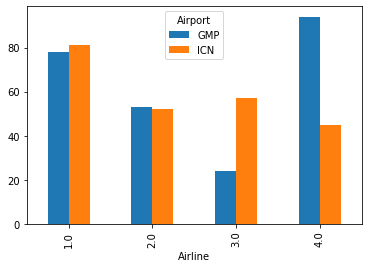

In [43]:
df_plot.groupby(['Airport','Airline'])['ID'].count().unstack('Airport').plot.bar()

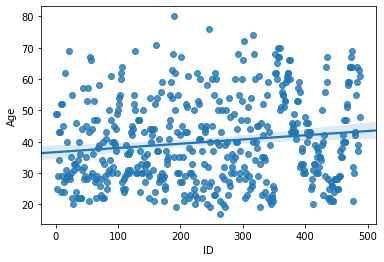

In [44]:
sns.regplot(x="ID", y="Age", data=df);
plt.show()

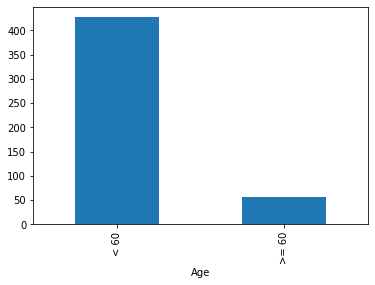

In [45]:
# Recategory Age
#df_clean['Age']=np.where(df_clean['Age'] < 60,1,0)
df_plot['Age']=df_plot['Age'].replace(1,'< 60')
df_plot['Age']=df_plot['Age'].replace(0,'>= 60')
a = df_plot.groupby(['Age'])['ID'].count()

a.plot.bar()

In [46]:
df_plot['Destination'] = df_plot['Destination'].replace('0', 'China')
df_plot['Destination'] = df_plot['Destination'].replace('1', 'Japan')
df_plot['Destination'] = df_plot['Destination'].replace('2', 'Southeast Asia')
df_plot['Destination'] = df_plot['Destination'].replace('3', 'Other')

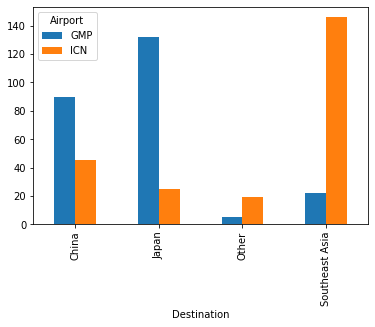

In [47]:
df_plot.groupby(['Airport','Destination'])['ID'].count().unstack('Airport').plot.bar()

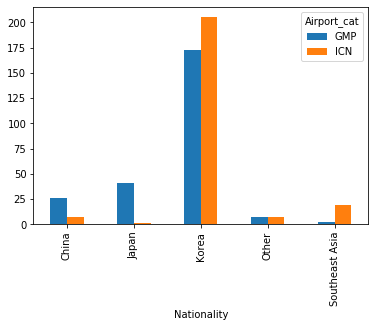

In [48]:
# Nationality, Airport
df2.groupby(['Airport_cat','Nationality'])['ID'].count().unstack('Airport_cat').plot.bar()

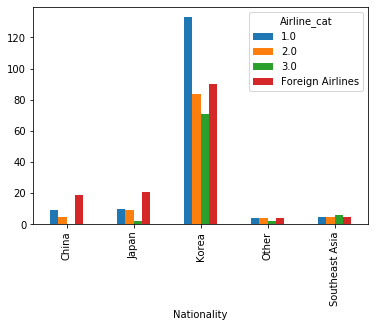

In [49]:
# Nationality, Airline
df2.groupby(['Airline_cat','Nationality'])['ID'].count().unstack('Airline_cat').plot.bar()

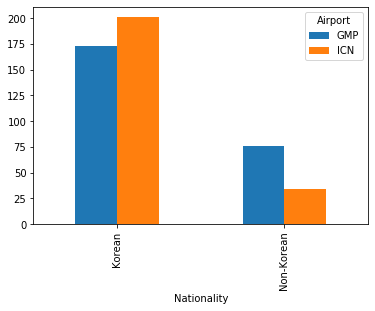

In [50]:
# Nationality & Airport
df_plot.loc[df_plot['Nationality']==1,'Nationality'] ='Korean'
df_plot.loc[df_plot['Nationality']==0,'Nationality'] ='Non-Korean'

df_plot.groupby(['Airport','Nationality'])['ID'].count().unstack('Airport').plot.bar()


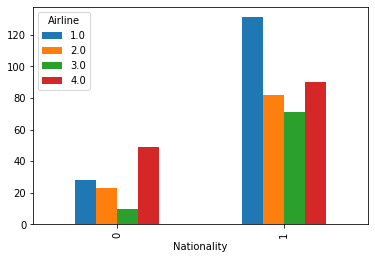

In [51]:
# Nationality & Airline
df_plot.loc[df_plot['Nationality']==1,'Nationality'] ='Korean'
df_plot.loc[df_plot['Nationality']==0,'Nationality'] ='Non-Korean'
df_clean.groupby(['Airline','Nationality'])['ID'].count().unstack('Airline').plot.bar()

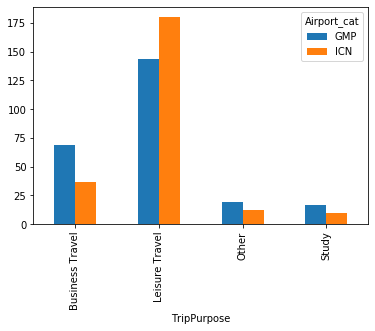

In [52]:
# Trippurpose & Airport
df2.groupby(['Airport_cat','TripPurpose'])['ID'].count().unstack('Airport_cat').plot.bar()

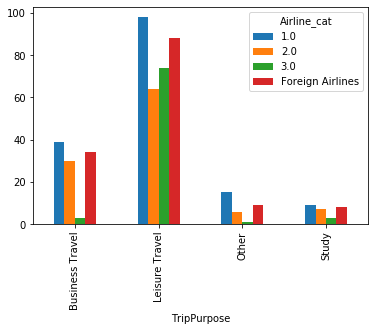

In [53]:
# Trippurpose & Airline
df2.groupby(['Airline_cat','TripPurpose'])['ID'].count().unstack('Airline_cat').plot.bar()

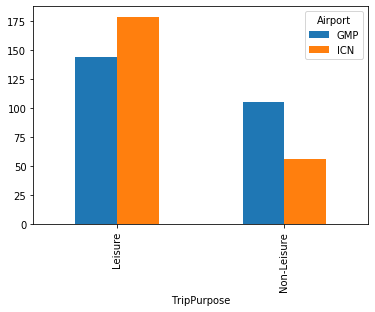

In [54]:
# Trippurpose & Airport
df_plot['TripPurpose']=df_plot['TripPurpose'].replace(1,'Leisure')
df_plot['TripPurpose']=df_plot['TripPurpose'].replace(0,'Non-Leisure')

df_plot.groupby(['Airport','TripPurpose'])['ID'].count().unstack('Airport').plot.bar()

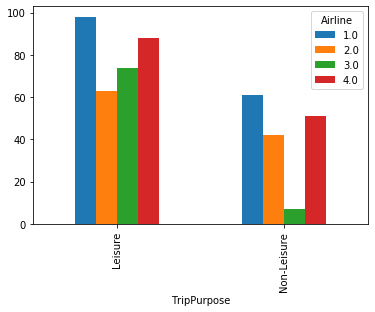

In [55]:
# Trippurpose & Airline
df_plot.groupby(['Airline','TripPurpose'])['ID'].count().unstack('Airline').plot.bar()

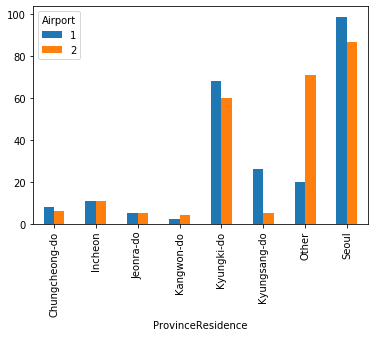

In [56]:
# Airport, ProvinceResidence
df2.groupby(['Airport','ProvinceResidence'])['ID'].count().unstack('Airport').plot.bar()

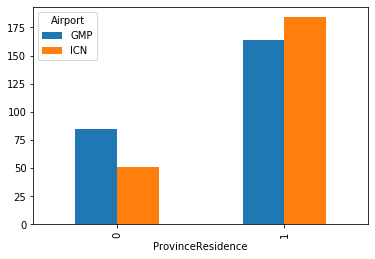

In [57]:
# ProvinceResidence & Airport
df_plot.groupby(['Airport','ProvinceResidence'])['ID'].count().unstack('Airport').plot.bar()

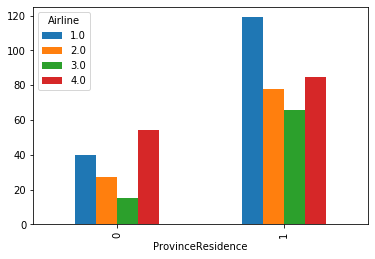

In [58]:
# ProvinceResidence & Airline
df_plot.groupby(['Airline','ProvinceResidence'])['ID'].count().unstack('Airline').plot.bar()

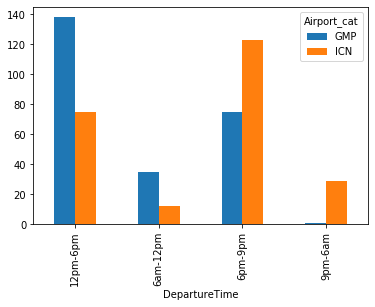

In [59]:
df2.groupby(['Airport_cat','DepartureTime'])['ID'].count().unstack('Airport_cat').plot.bar()

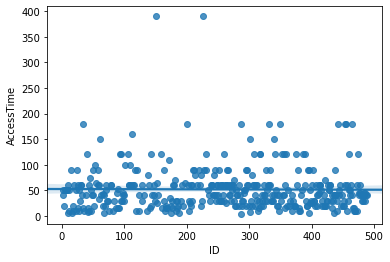

In [60]:
sns.regplot(x="ID", y="AccessTime", data=df2);
plt.show()

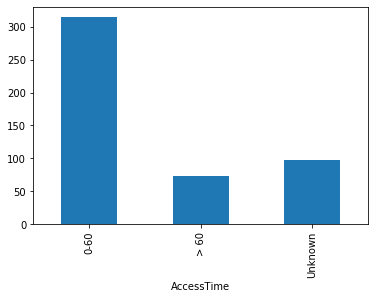

In [61]:
# AccessTime regroup
df_plot['AccessTime']=df_plot['AccessTime'].replace('0','0-60')
df_plot['AccessTime']=df_plot['AccessTime'].replace('1','> 60')
df_plot['AccessTime']=df_plot['AccessTime'].replace('2','Unknown')

df_plot.groupby(['AccessTime'])['ID'].count().plot.bar()


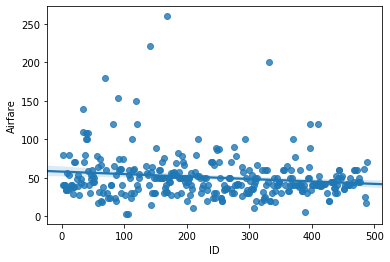

In [62]:
sns.regplot(x="ID", y="Airfare", data=df2);
plt.show()

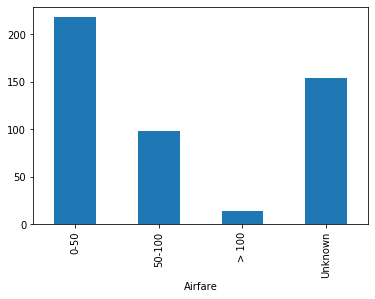

In [63]:
# acssesstime regroup
df_plot['Airfare']=df_plot['Airfare'].replace('0','0-50')
df_plot['Airfare']=df_plot['Airfare'].replace('1','50-100')
df_plot['Airfare']=df_plot['Airfare'].replace('2','> 100')
df_plot['Airfare']=df_plot['Airfare'].replace('3','Unknown')


df_plot.groupby(['Airfare'])['ID'].count().plot.bar()

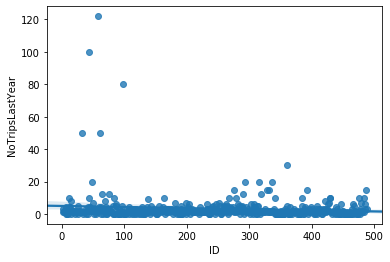

In [64]:
sns.regplot(x="ID", y="NoTripsLastYear", data=df2);
plt.show()

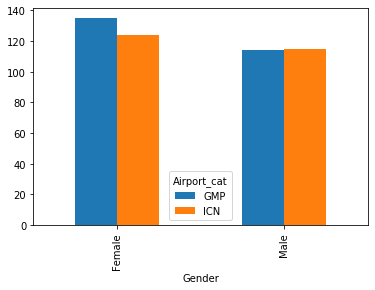

In [65]:
df2.groupby(['Airport_cat','Gender'])['ID'].count().unstack('Airport_cat').plot.bar()

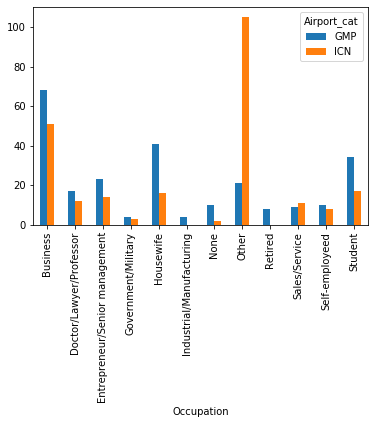

In [66]:
# Airport, Occupation
df2.groupby(['Airport_cat','Occupation'])['ID'].count().unstack('Airport_cat').plot.bar()

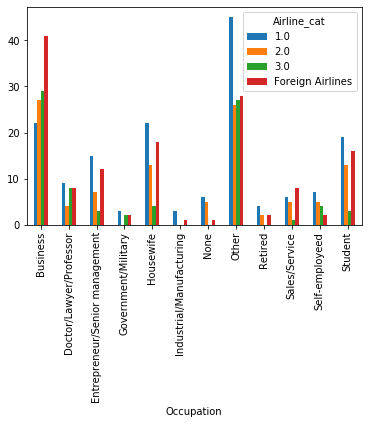

In [67]:
# Airline, Occupation
df2.groupby(['Airline_cat','Occupation'])['ID'].count().unstack('Airline_cat').plot.bar()

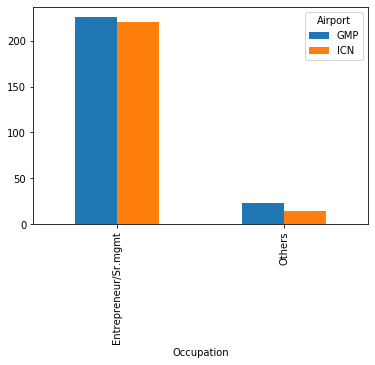

In [68]:
# Occupation & Airport
df_plot['Occupation']=df_plot['Occupation'].replace(1,'Entrepreneur/Sr.mgmt')
df_plot['Occupation']=df_plot['Occupation'].replace(0,'Others')

df_plot.groupby(['Airport','Occupation'])['ID'].count().unstack('Airport').plot.bar()

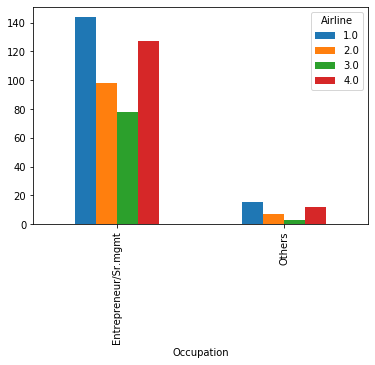

In [69]:
# Occupation & Airline
df_plot.groupby(['Airline','Occupation'])['ID'].count().unstack('Airline').plot.bar()

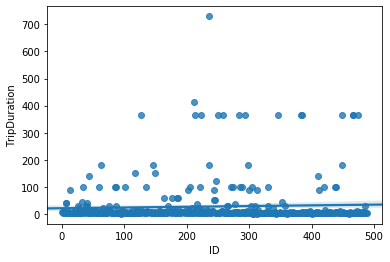

In [70]:
# TripDuration 
sns.regplot(x="ID", y="TripDuration", data=df2);
plt.show()

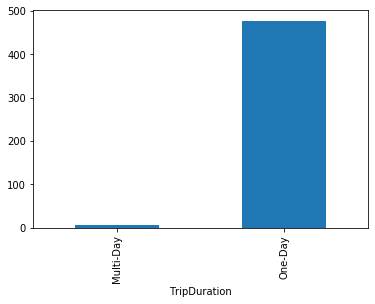

In [71]:
# TripDuration & Airport
df_plot['TripDuration']=df_plot['TripDuration'].replace(1,'One-Day')
df_plot['TripDuration']=df_plot['TripDuration'].replace(0,'Multi-Day')
df_plot.groupby(['TripDuration'])['ID'].count().plot.bar()

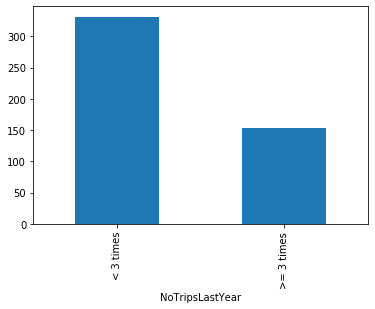

In [72]:
# NoTripsLastYear & Airport
df_plot['NoTripsLastYear']=df_plot['NoTripsLastYear'].replace(1,'>= 3 times')
df_plot['NoTripsLastYear']=df_plot['NoTripsLastYear'].replace(0,'< 3 times')
df_plot.groupby(['NoTripsLastYear'])['ID'].count().plot.bar()


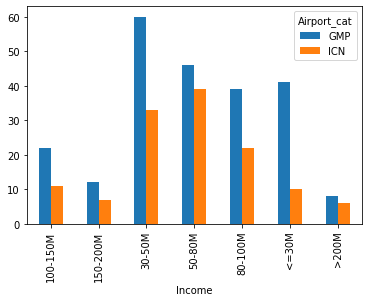

In [73]:
# Airport, Income
df2.groupby(['Airport_cat','Income'])['ID'].count().unstack('Airport_cat').plot.bar()

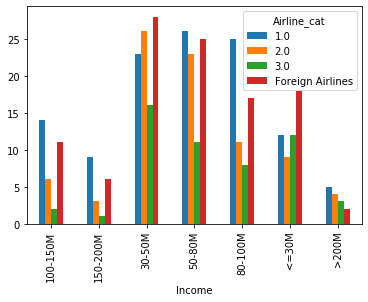

In [74]:
# Airline, Income
df2.groupby(['Airline_cat','Income'])['ID'].count().unstack('Airline_cat').plot.bar()

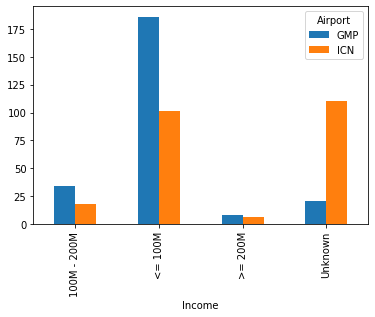

In [75]:
# Income & Airport
df_plot['Income']=df_plot['Income'].replace('0','<= 100M')
df_plot['Income']=df_plot['Income'].replace('1','100M - 200M')
df_plot['Income']=df_plot['Income'].replace('2','>= 200M')
df_plot['Income']=df_plot['Income'].replace('3','Unknown')

df_plot.groupby(['Airport','Income'])['ID'].count().unstack('Airport').plot.bar()

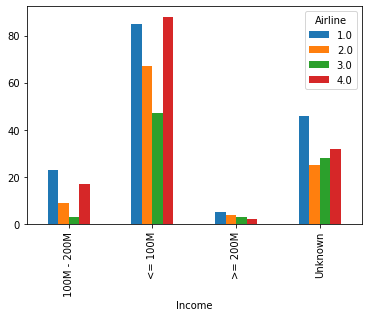

In [76]:
# Income & Airline
df_plot.groupby(['Airline','Income'])['ID'].count().unstack('Airline').plot.bar()

# Fit Models

# Logit Model

In [77]:
df_model = df_clean.iloc[:,:].copy()

In [78]:
df_model = df_model.drop(['ID','Airline','FlightNo','FlyingCompanion','DepartureHr','DepartureMn','ModeTransport','AccessCost',
                         'MileageAirline','Mileage'],axis=1)

In [79]:
# Convert all variable to category
col_names = list(df_model)

for col in col_names:
    df_model[col]=df_model[col].astype('category', copy=False)

In [80]:
# get dummies
df_model_dum = pd.get_dummies(df_model)

In [81]:
df_model_dum

,Airport_0,Airport_1,Age_0,Age_1,Gender_0,Gender_1,Nationality_0,Nationality_1,TripPurpose_0,TripPurpose_1,...,Occupation_0,Occupation_1,Income_0,Income_1,Income_2,Income_3,Airline_KOR_0,Airline_KOR_1,Airline_LCC_0,Airline_LCC_1
0,1,0,0,1,1,0,0,1,1,0,...,1,0,0,1,0,0,0,1,0,1
1,1,0,0,1,0,1,0,1,0,1,...,0,1,1,0,0,0,0,1,0,1
2,1,0,0,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,1
3,1,0,0,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,1
4,1,0,0,1,0,1,0,1,1,0,...,1,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,0,1,0,1,1,0,0,1,1,0,...,0,1,1,0,0,0,1,0,0,1
484,0,1,0,1,0,1,0,1,1,0,...,0,1,0,1,0,0,1,0,0,1
485,0,1,1,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1
486,0,1,1,0,1,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,1


In [82]:
# Convert all variable to float
col_names1 = list(df_model_dum)

for col in col_names1:
    df_model_dum[col]=df_model_dum[col].astype(float, copy=False)

In [83]:
# logit model 1 intercept only
df_model_dum['intercept'] = 1.0
y1=df_model_dum['Airport_1']
#df_model_dum['Airport_1']=df_model_dum['Airport_1'].astype(float)

X1=df_model_dum['intercept']
logit_model1 = sm.Logit(y1, X1).fit()
print(logit_model1.summary())

Optimization terminated successfully.
         Current function value: 0.692729
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:              Airport_1   No. Observations:                  484
Model:                          Logit   Df Residuals:                      483
Method:                           MLE   Df Model:                            0
Date:                Sat, 14 Mar 2020   Pseudo R-squ.:               1.046e-11
Time:                        23:40:26   Log-Likelihood:                -335.28
converged:                       True   LL-Null:                       -335.28
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0579      0.091      0.636      0.525      -0.120       0.236


In [84]:
# logit model 2 Airline Korea and non-Korea Category
df_model_dum['intercept'] = 1
y2=df_model_dum['Airport_1']

X2=df_model_dum[['intercept','Airline_KOR_1']]
logit_model2 = sm.Logit(y2, X2).fit()
print(logit_model2.summary())

Optimization terminated successfully.
         Current function value: 0.671239
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Airport_1   No. Observations:                  484
Model:                          Logit   Df Residuals:                      482
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Mar 2020   Pseudo R-squ.:                 0.03102
Time:                        23:40:26   Log-Likelihood:                -324.88
converged:                       True   LL-Null:                       -335.28
Covariance Type:            nonrobust   LLR p-value:                 5.093e-06
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.7366      0.181      4.064      0.000       0.381       1.092
Airline_KOR_1    -0.

In [85]:
# logit model 3
df_model_dum['intercept'] = 1
y3=df_model_dum['Airport_1']

X3=df_model_dum[['intercept','Airline_KOR_1','Age_1','Nationality_1']]
logit_model3 = sm.Logit(y3, X3).fit()
print(logit_model3.summary())

Optimization terminated successfully.
         Current function value: 0.645756
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Airport_1   No. Observations:                  484
Model:                          Logit   Df Residuals:                      480
Method:                           MLE   Df Model:                            3
Date:                Sat, 14 Mar 2020   Pseudo R-squ.:                 0.06781
Time:                        23:40:26   Log-Likelihood:                -312.55
converged:                       True   LL-Null:                       -335.28
Covariance Type:            nonrobust   LLR p-value:                 7.353e-10
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         2.3319      0.403      5.791      0.000       1.543       3.121
Airline_KOR_1    -0.

In [86]:
# logit model 4
df_model_dum['intercept'] = 1
y4=df_model_dum['Airport_1']

X4=df_model_dum[['intercept','Airline_KOR_1','Age_1','Nationality_1','TripPurpose_1']]
logit_model4 = sm.Logit(y4, X4).fit()
print(logit_model4.summary())

Optimization terminated successfully.
         Current function value: 0.629135
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Airport_1   No. Observations:                  484
Model:                          Logit   Df Residuals:                      479
Method:                           MLE   Df Model:                            4
Date:                Sat, 14 Mar 2020   Pseudo R-squ.:                 0.09180
Time:                        23:40:26   Log-Likelihood:                -304.50
converged:                       True   LL-Null:                       -335.28
Covariance Type:            nonrobust   LLR p-value:                 1.364e-12
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         2.9194      0.440      6.629      0.000       2.056       3.783
Airline_KOR_1    -0.

In [87]:
# logit model 5
df_model_dum['intercept'] = 1
y5=df_model_dum['Airport_1']

X5=df_model_dum[['intercept','Airline_KOR_1','Age_1','Nationality_1','FrequentFlightDestination_1',
                 'FrequentFlightDestination_2','Destination_1','Destination_2','Destination_3','DepartureTime_1',
                 'DepartureTime_2','DepartureTime_3','SeatClass_1','SeatClass_2','Airfare_1','Airfare_2']]
logit_model5 = sm.Logit(y5, X5).fit()
print(logit_model5.summary())

Optimization terminated successfully.
         Current function value: 0.368623
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Airport_1   No. Observations:                  484
Model:                          Logit   Df Residuals:                      468
Method:                           MLE   Df Model:                           15
Date:                Sat, 14 Mar 2020   Pseudo R-squ.:                  0.4679
Time:                        23:40:26   Log-Likelihood:                -178.41
converged:                       True   LL-Null:                       -335.28
Covariance Type:            nonrobust   LLR p-value:                 7.772e-58
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
intercept                       5.6164      0.832      6.751      0.000   

In [88]:
# logit model 6
df_model_dum['intercept'] = 1
y6=df_model_dum['Airport_1']

X6=df_model_dum[['intercept','Airline_KOR_1','Age_1','Nationality_1','FrequentFlightDestination_1',
                 'FrequentFlightDestination_2','Destination_1','Destination_2','Destination_3','DepartureTime_1',
                 'DepartureTime_2','DepartureTime_3','Airfare_1','Airfare_2','AccessTime_1','NoTransport_1']]
logit_model6 = sm.Logit(y6, X6).fit()
print(logit_model6.summary())

Optimization terminated successfully.
         Current function value: 0.357291
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Airport_1   No. Observations:                  484
Model:                          Logit   Df Residuals:                      468
Method:                           MLE   Df Model:                           15
Date:                Sat, 14 Mar 2020   Pseudo R-squ.:                  0.4842
Time:                        23:40:26   Log-Likelihood:                -172.93
converged:                       True   LL-Null:                       -335.28
Covariance Type:            nonrobust   LLR p-value:                 4.026e-60
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
intercept                       5.7835      0.852      6.785      0.000   

In [89]:
# logit model 7 (Model 1 in report)
df_model_dum['intercept'] = 1
y7=df_model_dum['Airport_1']
#df_model_dum['Airport_1']=df_model_dum['Airport_1'].astype(float)
#df_model_dum['Airline_KOR_1']=df_model_dum['Airline_KOR_1'].astype()

X7=df_model_dum[['intercept','Airline_KOR_1','Age_1','Gender_1','TripPurpose_1','FrequentFlightDestination_1',
                 'FrequentFlightDestination_2','Nationality_1','Destination_1','Destination_2','Destination_3',
                 'Airfare_1','Airfare_2','Airfare_3','NoTransport_1','Occupation_1','Income_1','Income_2','Income_3',
                'DepartureTime_1','DepartureTime_2','DepartureTime_3']]
logit_model7 = sm.Logit(y7, X7).fit()
print(logit_model7.summary())

Optimization terminated successfully.
         Current function value: 0.327993
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Airport_1   No. Observations:                  484
Model:                          Logit   Df Residuals:                      462
Method:                           MLE   Df Model:                           21
Date:                Sat, 14 Mar 2020   Pseudo R-squ.:                  0.5265
Time:                        23:40:26   Log-Likelihood:                -158.75
converged:                       True   LL-Null:                       -335.28
Covariance Type:            nonrobust   LLR p-value:                 4.440e-62
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
intercept                       5.3593      1.027      5.216      0.000   

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
reg=LogisticRegression()
K_Fold_Scores = cross_val_score(reg, X7, y7, cv=10, scoring='neg_mean_squared_error')
print("The K-Fold Validation Error is:",-K_Fold_Scores.mean())

accuracy = cross_val_score(LogisticRegression(fit_intercept = False, C = 1e9), X7, y7, cv=10, scoring='accuracy')
print("The K-Fold Validation Accuracy is:",accuracy.mean())

The K-Fold Validation Error is: 0.18598748009842234
The K-Fold Validation Accuracy is: 0.8306366695614414


/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

In [92]:
# logit model 8 (Model 2 in report)
df_model_dum['intercept'] = 1
y8=df_model_dum['Airport_1']

X8=df_model_dum[['intercept','Airline_KOR_1','Age_1','ProvinceResidence_1','Nationality_1','Destination_1',
                 'Destination_2','Destination_3','Income_1','Income_2','Income_3','AccessTime_1','AccessTime_2',
                 'DepartureTime_1','DepartureTime_2','DepartureTime_3']]
logit_model8 = sm.Logit(y8, X8).fit()
print(logit_model8.summary())

Optimization terminated successfully.
         Current function value: 0.304064
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Airport_1   No. Observations:                  484
Model:                          Logit   Df Residuals:                      468
Method:                           MLE   Df Model:                           15
Date:                Sat, 14 Mar 2020   Pseudo R-squ.:                  0.5611
Time:                        23:40:27   Log-Likelihood:                -147.17
converged:                       True   LL-Null:                       -335.28
Covariance Type:            nonrobust   LLR p-value:                 6.761e-71
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               7.3920      0.999      7.399      0.000       5.434       9.350
Ai

In [93]:
reg=LogisticRegression()
K_Fold_Scores = cross_val_score(reg, X8, y8, cv=10, scoring='neg_mean_squared_error')
print("The K-Fold Validation Error is:",-K_Fold_Scores.mean())

accuracy = cross_val_score(LogisticRegression(fit_intercept = False, C = 1e9), X8, y8, cv=10, scoring='accuracy')
print("The K-Fold Validation Accuracy is:",accuracy.mean())

/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

The K-Fold Validation Error is: 0.1548596034158344
The K-Fold Validation Accuracy is: 0.8573852945433493


/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

In [94]:
# logit model 9 Model 3 in report
df_model_dum['intercept'] = 1
y9=df_model_dum['Airport_1']

X9=df_model_dum[['intercept','Airline_KOR_1','Age_1','ProvinceResidence_1','Nationality_1','Destination_1',
                 'Destination_2','Destination_3','Income_1','Income_2','Income_3','AccessTime_1','AccessTime_2',
                 'DepartureTime_1','DepartureTime_2','DepartureTime_3','Airfare_1', 'Airfare_2', 'Airfare_3']]
logit_model9 = sm.Logit(y9, X9).fit()
print(logit_model9.summary())

Optimization terminated successfully.
         Current function value: 0.296176
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Airport_1   No. Observations:                  484
Model:                          Logit   Df Residuals:                      465
Method:                           MLE   Df Model:                           18
Date:                Sat, 14 Mar 2020   Pseudo R-squ.:                  0.5724
Time:                        23:40:27   Log-Likelihood:                -143.35
converged:                       True   LL-Null:                       -335.28
Covariance Type:            nonrobust   LLR p-value:                 2.105e-70
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               7.4939      1.056      7.098      0.000       5.425       9.563
Ai

In [95]:

reg=LogisticRegression()
K_Fold_Scores = cross_val_score(reg, X9, y9, cv=10, scoring='neg_mean_squared_error')
print("The K-Fold Validation Error is:",-K_Fold_Scores.mean())

accuracy = cross_val_score(LogisticRegression(fit_intercept = False, C = 1e9), X9, y9, cv=10, scoring='accuracy')
print("The K-Fold Validation Accuracy is:",accuracy.mean())

/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

The K-Fold Validation Error is: 0.1527301346070343
The K-Fold Validation Accuracy is: 0.8677630626718773


/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

In [96]:
# logit model Airline Model in report
df_model_dum['intercept'] = 1
y_A = df_model_dum['Airline_LCC_1']

X_A = df_model_dum[['intercept','Occupation_1','Gender_1','TripPurpose_1','GroupTravel_1','Destination_1',
                 'Destination_2','Destination_3','Income_1','Income_2','Income_3','AccessTime_1','AccessTime_2',
                 'DepartureTime_1','DepartureTime_2','DepartureTime_3','Airfare_1', 'Airfare_2', 'Airfare_3']]
logit_modelA = sm.Logit(y_A, X_A).fit()
print(logit_modelA.summary())

/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.245834
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          Airline_LCC_1   No. Observations:                  484
Model:                          Logit   Df Residuals:                      465
Method:                           MLE   Df Model:                           18
Date:                Sat, 14 Mar 2020   Pseudo R-squ.:                  0.4557
Time:                        23:40:27   Log-Likelihood:                -118.98
converged:                      False   LL-Null:                       -218.61
Covariance Type:            nonrobust   LLR p-value:                 1.417e-32
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          21.9707   9421.171      0.002      0.998   -1.84e+04    1.85e+04
Occupation_1        0.5395      1.005      0.537  

In [97]:

reg=LogisticRegression()
K_Fold_Scores = cross_val_score(reg, X9, y9, cv=10, scoring='neg_mean_squared_error')
print("The K-Fold Validation Error is:",-K_Fold_Scores.mean())

accuracy = cross_val_score(LogisticRegression(fit_intercept = False, C = 1e9), X_A, y_A, cv=10, scoring='accuracy')
print("The K-Fold Validation Accuracy is:",accuracy.mean())

/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

The K-Fold Validation Error is: 0.1527301346070343
The K-Fold Validation Accuracy is: 0.8577261904761905


/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/appleair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

# Decision Tree

## Airport 

### Model 1

In [98]:
df_tree = df_clean.iloc[:,:].copy()

In [99]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 0 to 487
Data columns (total 30 columns):
ID                           484 non-null int64
Airport                      484 non-null int64
Airline                      484 non-null float64
Age                          484 non-null int64
Gender                       484 non-null int64
Nationality                  484 non-null int64
TripPurpose                  484 non-null int64
TripDuration                 484 non-null int64
FlyingCompanion              484 non-null int64
ProvinceResidence            484 non-null object
GroupTravel                  484 non-null int64
NoTripsLastYear              484 non-null int64
FrequentFlightDestination    484 non-null object
Destination                  484 non-null object
FlightNo                     342 non-null object
DepartureHr                  452 non-null object
DepartureMn                  365 non-null float64
DepartureTime                484 non-null object
SeatClass            

In [100]:
## All Variables
y=df_tree['Airport']

X=df_tree.drop(['ID','Airport', 'DepartureHr','DepartureMn', 'AccessCost',
                 'FrequentFlightDestination','FlightNo','MileageAirline','Mileage','Airline_KOR','Airline_LCC'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=109)  
clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10, max_features=None, 
                                  max_leaf_nodes=None, min_samples_leaf=20, min_samples_split=2, 
                                  min_weight_fraction_leaf=0.0, presort=False, random_state=100, splitter='best')
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)  
print(metrics.confusion_matrix(y_test, y_pred))

[[63 15]
 [ 5 63]]


In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86        78
           1       0.81      0.93      0.86        68

    accuracy                           0.86       146
   macro avg       0.87      0.87      0.86       146
weighted avg       0.87      0.86      0.86       146



In [102]:
airport_all_tree = tree.export_graphviz(clf, out_file='airport_all_new_Dtree.dot', feature_names=X.columns)

### Model 2

In [103]:
##Without AccessTime & Income
y=df_tree['Airport']

X=df_tree.drop(['ID','Airport', 'DepartureHr','DepartureMn', 'AccessCost','AccessTime','Income',
                 'FrequentFlightDestination','FlightNo','MileageAirline','Mileage','Airline_KOR','Airline_LCC'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=109)  
clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10, max_features=None, 
                                  max_leaf_nodes=None, min_samples_leaf=20, min_samples_split=2, 
                                  min_weight_fraction_leaf=0.0, presort=False, random_state=100, splitter='best')
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)  
print(metrics.confusion_matrix(y_test, y_pred)) 

[[51 27]
 [ 2 66]]


In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.65      0.78        78
           1       0.71      0.97      0.82        68

    accuracy                           0.80       146
   macro avg       0.84      0.81      0.80       146
weighted avg       0.84      0.80      0.80       146



In [105]:
airport_tree = tree.export_graphviz(clf, out_file='airport_new_Dtree.dot', feature_names=X.columns)

## Airline

### Model 1: Korean/Non-Korean Airline

In [106]:
y=df_tree['Airline_KOR']

X=df_tree.drop(['ID', 'Airline','DepartureHr','DepartureMn', 'AccessCost',
                 'FrequentFlightDestination','FlightNo','MileageAirline','Mileage','Airline_KOR','Airline_LCC'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=109)  
clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10, max_features=None, 
                                  max_leaf_nodes=None, min_samples_leaf=20, min_samples_split=2, 
                                  min_weight_fraction_leaf=0.0, presort=False, random_state=100, splitter='best')
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)  
print(metrics.confusion_matrix(y_test, y_pred))  
#'AccessTime','Income'

[[11 25]
 [17 93]]


In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.31      0.34        36
           1       0.79      0.85      0.82       110

    accuracy                           0.71       146
   macro avg       0.59      0.58      0.58       146
weighted avg       0.69      0.71      0.70       146



In [108]:
airline_korean_tree = tree.export_graphviz(clf, out_file='airline_korean_new_Dtree.dot', feature_names=X.columns)

### Model 2: LLC/ Non-LLC Airline

In [109]:
y=df_tree['Airline_LCC']

X=df_tree.drop(['ID', 'Airline','DepartureHr','DepartureMn', 'AccessCost','Airfare',
                 'FrequentFlightDestination','FlightNo','MileageAirline','Mileage','Airline_KOR','Airline_LCC'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=109)  
clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10, max_features=None, 
                                  max_leaf_nodes=None, min_samples_leaf=20, min_samples_split=2, 
                                  min_weight_fraction_leaf=0.0, presort=False, random_state=100, splitter='best')
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)  
print(metrics.confusion_matrix(y_test, y_pred)) 

[[  8  22]
 [  4 112]]


In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.27      0.38        30
           1       0.84      0.97      0.90       116

    accuracy                           0.82       146
   macro avg       0.75      0.62      0.64       146
weighted avg       0.80      0.82      0.79       146



In [111]:
airline_LCC_tree = tree.export_graphviz(clf, out_file='airline_LCC_new_Dtree.dot', feature_names=X.columns)